![header](https://i.imgur.com/I4ake6d.jpg)



# Copernicus Marine Sea Level America Training (1/2)

<div style="text-align: right"><i> 08-01-SEALEVEL-Part-one-out-of-two </i></div>

***

# How to quickly plot Copernicus Sea Level Satellite Observations data ?

<img src="./img/08-SL-01_ProductLevelPrez-2.png" width="900">

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents

- [1. Introduction](#1.-Introduction)
  - Environment Setup
- [2. Initialize Dataset from File](#2.-Initialize-Dataset-from-File)
  - [2.1. Load L4 Product through xarray](#2.1.-Load-L4-Product-through-xarray)
  - [2.2. Examine L4 Product Metadata](#2.2.-Examine-L4-Product-Metadata)
- [3. Read and load a data variable for L4 Product: Sea Level Anomalies](#3.-Read-and-load-a-data-variable-for-L4-Product:-Sea-Level-Anomalies)
- [4. Plot the Data](#4.-Plot-the-Data)
  - [4.1. Plot the whole dataset for Sea Level Anomaly](#4.1.-Plot-the-whole-dataset-for-Sea-Level-Anomaly)
  - [4.2. Zoom visually on the area](#4.2.-Zoom-visually-on-the-area)
  - [4.3. Mapping the dynamic topography](#4.3.-Mapping-the-dynamic-topography)
  - [4.4. Mapping the geostrophic currents](#4.4.-Mapping-the-geostrophic-currents)
  - [4.5. Mapping the formal error (err)](#4.5.-Mapping-the-formal-error-(err))
  
***

## 1. Introduction


[Go back to the "Table of contents"](#Table-of-contents)

We will focus on the following product (available on the [Copernicus Catalogue](http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&task=results)):
- [SEALEVEL_GLO_PHY_L4_NRT_OBSERVATIONS_008_046](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEALEVEL_GLO_PHY_L4_NRT_OBSERVATIONS_008_046)

Those data come from several radar altimetry satellites, and provide with sea surface height with respect to different vertical references. This is not a "raw" product straight from satellite measurements, but is mightily processed. We will see later on some rawer products.


<div class="alert alert-block alert-success">
<b>Specificities</b>

***  
- `Level4`: gap-free gridded data. These products are altimetry maps and constitute the highest-level and most user-friendly altimetry data. Data have had the greatest amount of processing applied, possibly including modelled output and measurements from several satellites and several days. All input data are validated.
</div>

To read more about the processing, you can see [<a href="./docs/References/os-12-1067-2016.pdf" target="_blank">Pujol et al, 2016</a>] and [<a href="./docs/References/os-15-1207-2019.pdf" target="_blank">Taburet et al, 2019</a>] in the <b>docs/references</b> folder.

<hr width='50%'>

We will look at the area west of central America with eddies shed.

<hr>

### Environment Setup

At first, let's setup the notebook with all the necessary tools available from the Jupyter Notebook Ecosystem.

#### Importing modules
* Unlike MATLAB, Python libraries need to be `imported` before they can be used
* Imported libraries often have a short name ("namespace")
* Portions of libraries, can be imported

In [2]:
%matplotlib inline
import os                         # Import os (operating system interface (manage paths, create dirs,...)
import xarray                     # Import xarray (python interface to manipulate multidimensional gridded data)
import matplotlib                 # Import the math & plotting library
import matplotlib.pyplot as plt   # Define the namespace for the plots
plt.rcParams["figure.figsize"] = (14,7) #define the size of the figures 
import cartopy                  # Import the mapping library (note: this is needed to deal with mapping projections)
import cartopy.crs as ccrs      #  Define the namespace for the geographical projections
# The following is not generally recommended, but avoid un-necessary warning messages in today's training frame
import warnings
warnings.filterwarnings('ignore')

## 2. Initialize Dataset from File

[Go back to the "Table of contents"](#Table-of-contents)

### 2.1. Load L4 Product through xarray

In [3]:
# define the folder where the data were stored. 
rootPath = 'data/'
# define the file in the data folder
MyInputFile = 'nrt_global_allsat_phy_l4_20210413_20210413.nc'
mydataset = xarray.open_dataset(rootPath + MyInputFile)

First, let's inspect the content of this netCDF file to see the variables names and the size in longitude/latitude or other dimensions. Another way of doing this is to use the "Panoply" software.

### 2.2. Examine L4 Product Metadata
[Go back to the "Table of contents"](#Table-of-contents)

NetCDF is a self-described format, i.e. it includes information ("metadata") that describes and explains the data, such as explicit name (long_name), standardized name (standard_name), comment, units, min and max values, also default value, etc. Those information are called "attributes", and are specific to the file, or to each variable; they are mostly optional, but highly recommended; the "standardization" of the format makes some of them mandatory. It is part of the CMEMS requirements. 

<div class="alert alert-block alert-success">
<b>Objective</b>

***  
We will print the list of variables defined within the file.
</div> 

To read more about the processing, you can also see [<a href="./docs/References/os-12-1067-2016.pdf" target="_blank">Pujol et al, 2016</a>] and [<a href="./docs/References/os-15-1207-2019.pdf" target="_blank">Taburet et al, 2019</a>]

In [4]:
mydataset.data_vars

Data variables:
    crs        int32 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    err        (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err_ugosa  (time, latitude, longitude) float64 ...
    err_vgosa  (time, latitude, longitude) float64 ...

Those are the variables within the product; 
The names between parenthesis are the dimensions of the variable, i.e. the parameters the data use as coordinates (here, time, latitude and longitude).
The main interest of the NetCDF data format is to be self-described, i.e., it includes a number of information describing the data (variables and dimensions both), such as units, standardized names (following a precise dictionary with international conventions set), long_name, comment...
You can have a look at them using python (they are also described in the product user manual, see in the docs)

In [5]:
variable = 'sla'
print('the unit of the variable', variable, 'is', mydataset[variable].attrs['units'])

the unit of the variable sla is m


<div class="alert alert-block alert-info">
<b>TIP</b>

***
Using .attrs['name of the attribute'] , with name of the attribute = 'long_name', or 'standard_name', or 'comment' you can have a look at the other information. 
</div> 

## 3. Read and load a data variable for L4 Product: Sea Level Anomalies

[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
<b>Objective</b>

***  
We will read the Sea Level Anomalies variable.
</div>  

If you had a look at the standard names, you have seen that this is also called "sea_surface_height_above_sea_level"; 

Acronyms used below:
- <b>SLA</b> Sea Level Anomaly  (sea surface height with respect to a mean sea surface); it represents ocean variability
- <b>ADT</b> Absolute Dynamic Topography  (sea surface height with respect to the geoid); it represents the heights linked to everything moving in the ocean
- <b>MSS</b> Mean Sea Surface (a multi-year average of the sea surface heights with respect to a reference ellipsoid -- MSS is not provided here)
- <b>MDT</b> Mean Dynamic Topography : ADT = SLA + MDT ; MDT is obtained through MSS - geoid and also drifter current velocity analysis. It represents the heights linked to the mean stable currents. It is now provided through CMEMS as another dataset.


(NB. the reference ellipsoid is a geometric surface approximating Earth surface ; the geoid is an equipotential of the Earth gravity field)

<img src="./img/08-SEALEVEL-01_names-heights.png" width="400">

***

<b>We have chosen April 13, 2021 to visualise and test the data.</b>

In [6]:
# we define the date so as to be able to use it afterwards
mydate = '2021-04-13'
# we subset the initial dataset at this date in SeaLevelAnom using sel (for "selection")
# note that in the provided file you only have one date. 
SeaLevelAnom = mydataset['sla'].sel(time=mydate)
# Finally, we upload and store the latitude and longitude so as to be able to call them later on
latitude = mydataset['latitude']
longitude = mydataset['longitude']

## 4. Plot the Data

[Go back to the "Table of contents"](#Table-of-contents)

### 4.1. Plot the whole dataset for Sea Level Anomaly

We start with the coordinates of the "global" zone, i.e. the full geographical spread of the dataset. Note that the longitudes are defined from -180°E to 180°E

<img src="./img/slaglo_0centered.png">

In [7]:
lon_min=-180. ; lon_max=180. ; lat_min=-90. ; lat_max=90.

We plot the Sea Level Anomalies in a "plate carree" projection (scale: longitude = latitude), see https://scitools.org.uk/cartopy/docs/latest/crs/projections.html.

We are keeping the default color scale minimum and maximum (i.e. the minimum and maximum value of the variable within the given file -- it could be different on another day).
The lands are colored in grey (lightgrey) and delimited by a 1-px line. 
We set the extent of the plot using the maximum and minimum longitude and latitude defined above. 
We add a color scale (colorbar), and a title; here we put the unit of the scale in the title, in a 16-size font.

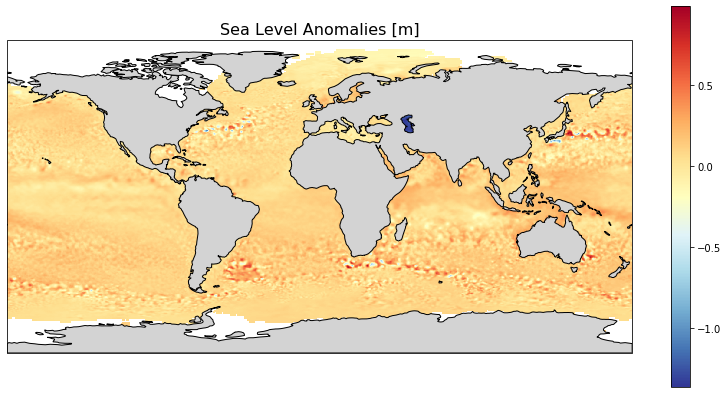

In [8]:
# Create python object from the "matplotlib" and its "pyplot" package (shortened as plt)
plt.figure()
# Create an "ax" from which we add the projection
ax = plt.axes(projection=ccrs.PlateCarree())
# Add a layer for the continent
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
# Set the extent of the map.
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
# Define a colormesh which is the color plot
mymap = ax.pcolormesh(longitude, latitude, SeaLevelAnom, cmap='RdYlBu_r')
# Add a colorbar to the map object to give scale
plt.colorbar(mymap, ax=ax)
# Add a title to the map object
plt.title('Sea Level Anomalies [m]', size=16)
plt.show()

### 4.2. Zoom visually on the area
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
<b>Objective</b>

***  
We are focusing on a particular area.
</div>  
We will look at the region lon_min=-120. ; lon_max=-75. ; lat_min=5. ; lat_max=20.

We have, still loaded into memory: longitude, latitude and SeaLevelAnom

<img src="./img/sla_Tehuantepec.png">


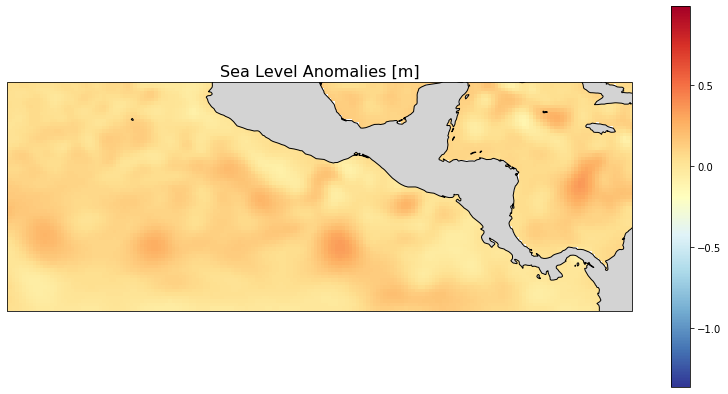

In [9]:
lon_min=-120. ; lon_max=-75. ; lat_min=5. ; lat_max=20.

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# actually plot the data
mymap = ax.pcolormesh(longitude, latitude, SeaLevelAnom, transform=ccrs.PlateCarree(), cmap='RdYlBu_r')
plt.colorbar(mymap, ax=ax)

plt.title('Sea Level Anomalies [m]', size=16)
plt.show()

<div class="alert alert-block alert-info">
<b>TIP</b> How to best fit a colorscale?

***
In the previous plots, we used the default minimum and maximum variable values for the color scale. Note that since we're using the global data file, it is defined on the global minimum and maximum. 
However, if you want to compare different dates or datasets you may need to force the minimum and maximum to identical values rather than use an automated definition (either the default, or defining it by telling explicitely it is the minimum of the data and the maximum of it -- which lead rigourously to the same). 

Moreover, the overall impression is rather uniform. You may prefer to see more details, and fitting the scale to (at least) the local min/max is a first step. 

</div>

So, here we will have a look at the above map, and define those extrema. 
you can try:

colormin=-0.5 ; colormax=0.5 

or 

colormin=-0.25 ; colormax=0.25

The second version will be saturated at the highest and lowest values, but will show more details for lower values -- it is your choice, depending on what you want to highlight. Going even lower for a global map is usual (+/-0.20 m or even +/-0.15 m) for the large quiet areas.

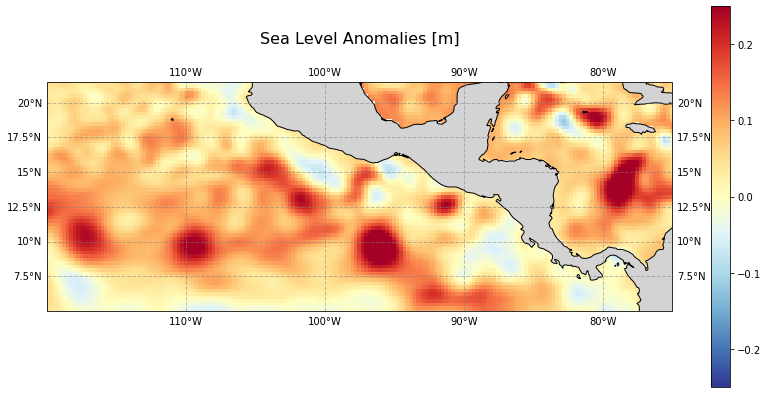

In [10]:
colormin=-0.25 ; colormax=0.25

plt.figure()
# sketchy coasts on the map... we call on a higher resolution library for land contours
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
#adding a grid to mark longitudes and latitudes, with labels
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
# actually plot the data
mymap = ax.pcolormesh(longitude, latitude, SeaLevelAnom, vmin=colormin, vmax=colormax, cmap='RdYlBu_r')
plt.colorbar(mymap, ax=ax)
#we pad the title to let some space for the grid label
plt.title('Sea Level Anomalies [m]', size=16, pad=24)
plt.show()

You can see a series of three-four warm eddies ("big red dot", i.e. higher-than-average-level roundish feature) in the Pacific, at around 10°N.

### 4.3. Mapping the dynamic topography
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
<b>Objective</b>

***  
How to map another variable?
</div>  
We map now the Absolute Dynamic Topography (ADT).

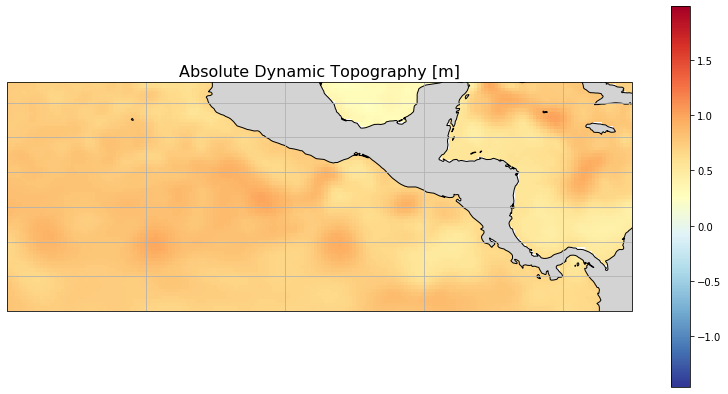

In [11]:
AbsDynTopo = mydataset['adt'].sel(time=mydate)
#longitude and latitude are already loaded into memory

plt.figure()
# sketchy coasts on the map... we call on a higher resolution library for land contours
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.gridlines()
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
# actually plot the data
mymap = ax.pcolormesh(longitude, latitude, AbsDynTopo, cmap='RdYlBu_r')
plt.colorbar(mymap, ax=ax)
plt.title('Absolute Dynamic Topography [m]', size=16)
plt.show()

Note that the plot is mostly higher than zero in this region (Pacific ocean absolute dynamic topography is higher than, e.g. Atlantic one), while the automated scale (defined from the global data) is not;
You can limit it to 0.0 , 1.0 ( vmin=colormin, vmax=colormax, with colormin=0 ; colormax=1.0 )

### 4.4. Mapping the geostrophic currents
[Go back to the "Table of contents"](#Table-of-contents)

In the data, you can also see two sets of variables named "geo" for geostrophic currents. We map one of them overlaid on previous Absolute Dynamic Topography map. 
For this, we will chose the one matching this variable: we have anomalies of the current, and the absolute version too. 
<br>Note that the plotting is quite long

Text(0.5, 1.0, 'Absolute Dynamic Topography [m]')

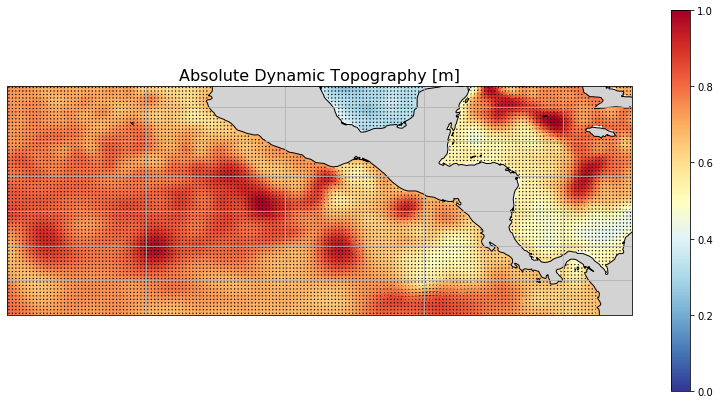

In [12]:
colormin=0. ; colormax=1.

uadtg = mydataset['ugos'].sel(time=mydate)
vadtg = mydataset['vgos'].sel(time=mydate)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.gridlines()
# Set the extent of the map
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Define a colormesh which is the color plot
mymap = ax.pcolormesh(longitude, latitude, AbsDynTopo, vmin=colormin, vmax=colormax, cmap='RdYlBu_r', zorder=1)
#here we have two components of a vector; we plot them as arrows
arrows = ax.quiver(longitude, latitude, uadtg, vadtg)
# Add a colorbar to the map object to give scale
plt.colorbar(mymap, ax=ax)
# Add a title to the map object
plt.title('Absolute Dynamic Topography [m]', size=16)

All those black dots are the arrows representing the currents. They are too small.

<div class="alert alert-block alert-info">
<b>TIP</b> How to play with the size of arrows?

***
Several options exist at this point:
- extract(select) a smaller area from your data to better see the arrows (here the scale is defined upon the global dataset, with an geographically extracted data file, it would fit the extrema of your area)
- scale the arrows by defining "scale= " in ax.quiver
- subsample your grid of arrows (e.g., every degree i.e. every four value)
- average the velocities every degree or so (neater, but not often done)
 
</div>

We will explore a combination of the second and third options.

Note that in the case of a strong current, you would have had long arrows within the currents, and much smaller ones out of it. 
The right balance depends on your need: 
- if you are looking at the strong current, use high values 
- if you are looking at the circulation away from the current, use lower values - the arrows within the current will be too long, but you will see some details away from it. 

Text(0.5, 1.0, 'Absolute Dynamic Topography [m]')

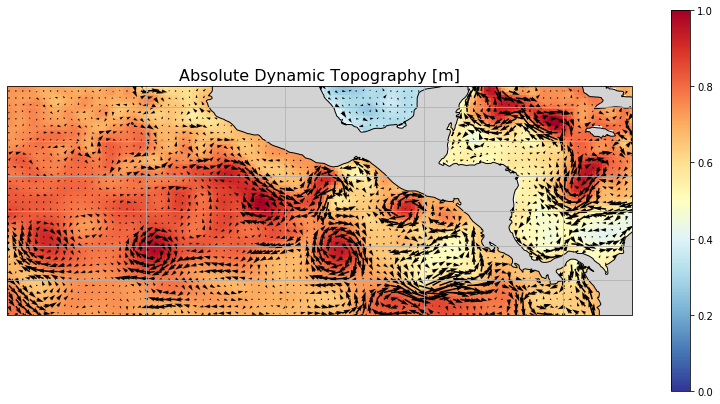

In [13]:
colormin=0. ; colormax=1.

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.gridlines()
# Set the extent of the map
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Define a colormesh which is the color plot
colormesh = ax.pcolormesh(longitude, latitude, AbsDynTopo,  vmin=colormin, vmax=colormax, cmap='RdYlBu_r', zorder=1)
#here we have two components of a vector; we plot them as arrows

# un-comment one of each of the lines below -- one "subsampl", one "arrowscale"
# subsampl is used to take only one point every (value), 
# arrowscale: the higher the value, the smaller the arrow
#subsampl = 1 
#subsampl = 4
subsampl = 2
#arrowscale = 10.
#arrowscale = 50.
arrowscale = 25.

arrows = ax.quiver(longitude[::subsampl], latitude[::subsampl], uadtg[::subsampl,::subsampl], vadtg[::subsampl,::subsampl], scale=arrowscale)
# Add a colorbar to the map object to give scale
plt.colorbar(colormesh, ax=ax)
# Add a title to the map object
plt.title('Absolute Dynamic Topography [m]', size=16)

You see currents around the (warm) eddies we saw above. 

### 4.5. Mapping the formal error (err)
[Go back to the "Table of contents"](#Table-of-contents)

Another available variable in the dataset is "err".
"err" is the error made in the mapping process. However, it does not include the measurement error (a complicated business in satellite in general, altimetry in particular. Teams are working on it, though, and it should be added in the near future).

A plot may help you to see what this is about.

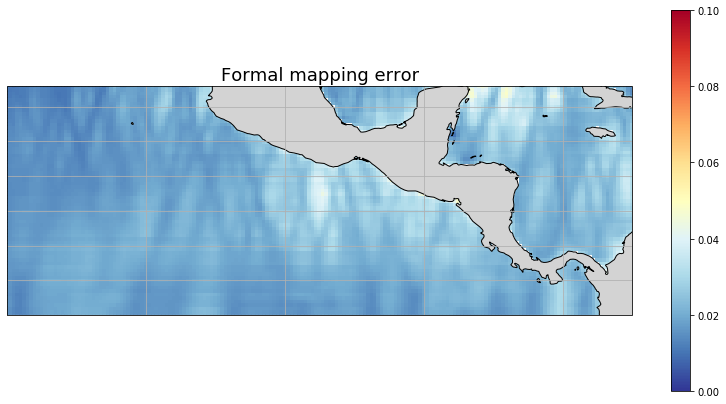

In [15]:
Err_mapping = mydataset['err'].sel(time=mydate)
latitude = mydataset['latitude']
longitude = mydataset['longitude']

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines()
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
# actually plot the data
colormin=0. ; colormax=0.1
colormesh = ax.pcolormesh(longitude, latitude, Err_mapping, vmin=colormin, vmax=colormax, cmap='RdYlBu_r')
plt.colorbar(colormesh, ax=ax)
plt.title('Formal mapping error', size=18)
plt.show()

In this plot, you can see some kind of ghost lines made by the lowest errors. 
Those are in fact the ground tracks overflown by the altimeter satellites. They are the places where the altimeters acquired measurements (and where those were considered valid by the validation processes). 
We will explore this more in depth in the second module.

<div class="alert alert-block alert-warning">

### This module in finished, so we close the file.

In [17]:
mydataset.close()

<div class="alert alert-block alert-success">

## Next Tutorial

_Click on the hyperlink below to continue the training_

[**08-SEALEVEL-02_sealevel-L3_uses.ipynb**](08-SEALEVEL-02_sealevel-L3_uses.ipynb)
